# ML Olympiad - Hausa Sentiment Analysis 2.0

--------

## INTRODUCTION

This challenge is part of the ML Olympiad, An associated Kaggle Community Competitions hosted by ML GDEs or TFUGs, sponsored by Google Developers.  

Hausa is a Chadic language, a branch of the Afroasiatic language family. It is the most spoken in the family, next to Arabic. Hausa is considered the largest ethnic group in sub-Saharan Africa, with some diverse native speakers who are culturally homogeneous.  

Sentiment analysis relies on multiple word senses and cultural knowledge and can be influenced by age, gender and socio-economic status. For this task, we have collected and annotated sentences from different social media platforms.  

## Objective

The objective of this challenge is to develop a multi-class classification model to classify news content according to its specific category. Given a sentence, the task is to classify whether the sentence is of positive (1), negative (-1) or neutral (0) sentiment. For messages conveying more than one sentiment, whichever is the stronger sentiment should be chosen.  

## Dataset Description

The Hausa dataset was preprocessed by removing links, emoji symbols, and punctuations.  
There are rows that might require some level of basic cleaninig.  
The collected comments were manually annotated using an overall polarity: positive (1), negative (0).  
Other rows (comments) provided are unlabelled, you can use other machine learning techniques to label them.  

## Variable definition:

***id***: Unique identifier of the text  
**newsText**: Text  
**label**: Sentiment of the tweet (-1 for Negative, 0 for Neutral, 1 for Positive)  



---

## Project Pipeline

<a id="cont"></a>

The various steps involved in this project are :

<a href=#one>1. Import Necessary Dependencies </a>

<a href=#two>2. Loading the Data </a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Preprocessing </a>

<a href=#five>5. Transforming Dataset using TF-IDF Vectorizer </a>

<a href=#six>6. Splitting our data into Train and Test Subset </a>

<a href=#seven>7. Model Building </a>

<a href=#eight>8. Model Performance</a>

<a href=#nine>9. Conclusion </a>

 <a id="one"></a>
### 1. Importing Necessary Dependencies
<a class="anchor" id="1.1"></a>


   
> Description: Importing Required Packages

In [1]:
# Libraries for data loading, data manipulation and data visulisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # plot style
from wordcloud import WordCloud

# Libraries for Natural Language Processing

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.util import ngrams
import re
import string

# Libraries for data preparation and model building

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Libraries for Model Performance and Evaluation
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
### 2. Loading the Data
<a class="anchor" id="2.1"></a>
<a href=#cont>Back to Table of Contents</a>

> Description: Loading the data  
>> In this section the data is going to be loaded from the 'train_unlabelled.csv', 'train.csv' and 'test.csv' files into a pandas DataFrame

In [2]:
df1 = pd.read_csv('dataset/train.csv')
df2 = pd.read_csv('dataset/test.csv')
df3 = pd.read_csv('dataset/train_unlabelled.csv',header=0, error_bad_lines=False)

b'Skipping line 4: expected 3 fields, saw 6\nSkipping line 5: expected 3 fields, saw 4\nSkipping line 6: expected 3 fields, saw 5\nSkipping line 7: expected 3 fields, saw 5\nSkipping line 8: expected 3 fields, saw 7\nSkipping line 9: expected 3 fields, saw 4\nSkipping line 10: expected 3 fields, saw 5\nSkipping line 12: expected 3 fields, saw 7\nSkipping line 14: expected 3 fields, saw 5\nSkipping line 15: expected 3 fields, saw 5\nSkipping line 16: expected 3 fields, saw 5\nSkipping line 17: expected 3 fields, saw 5\nSkipping line 19: expected 3 fields, saw 4\nSkipping line 20: expected 3 fields, saw 4\nSkipping line 21: expected 3 fields, saw 6\nSkipping line 23: expected 3 fields, saw 4\nSkipping line 25: expected 3 fields, saw 4\nSkipping line 27: expected 3 fields, saw 4\nSkipping line 30: expected 3 fields, saw 4\nSkipping line 31: expected 3 fields, saw 6\nSkipping line 33: expected 3 fields, saw 6\nSkipping line 34: expected 3 fields, saw 5\nSkipping line 35: expected 3 fields,

The train_unlabelled file has some bad lines which have been removed

Here a copy of the dataframe is created to avoid making changes to the original dataset

In [3]:
df_train = df1.copy()
df_test = df2.copy()
df_unlabelled = df3.copy()

<a id="three"></a>
### 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>


<img src="https://imgs.search.brave.com/nPNv6ju12upBCEiinjTg9aZQLyPKzZTkpHewmoo0aI8/rs:fit:750:360:1/g:ce/aHR0cHM6Ly93d3cu/YW5hbHl0aWNzc3Rl/cHMuY29tL2JhY2tl/bmQvbWVkaWEvdGh1/bWJuYWlsLzMxNTc5/NzcvODAwNjU1MV8x/NTg3MzI0Njk2X2Rh/dGElMjBhbmFseXNp/cy5qcGc" width="400">



> In this section,  data sets will be analyzed to find patterns, tell insights, and summarize their main characteristics, often with visual methods and an in-depth analysis of all the variables in the DataFrame. This helps for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.


In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        256 non-null    int64 
 1   NewsText  256 non-null    object
 2   label     256 non-null    int64 
 3   tokens    256 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.1+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        63 non-null     int64 
 1   NewsText  63 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
df_unlabelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   'id'        170 non-null    int64  
 1   'NewsText'  170 non-null    object 
 2   'label'     0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.1+ KB


In [7]:
df_train.shape

(256, 3)

In [8]:
df_test.shape

(63, 2)

In [9]:
df_unlabelled.shape

(170, 3)

In [10]:
df_train.head()

,id,NewsText,label
0,1000,Nan ne muka kawo karshen labarai da rahotannin na wannan rana,0
1,1001,Sai ku kasance tare da mu a gobe Litinin idan rai ya kai mu domin sake kawo muku wasu labarai da rahotannin na musamman,0
2,1002,Rahotanni sun ce tawagar bincike ta Saudiyya a Jami’ar Imam Abdulrahman bin Faisal ta samar da rigakafin korona kuma suna fatan fara gwajin rigakafin ba da dadewa ba,1
3,1003,"Jaridar Saudiyya da ake bugawa a London Al-Sharq al-Awsat ce ta bayar da rahoton a ranar Asabar inda ta ce tawagar wacce mace ke jagoranta, Farfesa Iman al-Mansour ta kammala gwajin farko kuma an har an wallafa sakamakon binciken na kimiya",1
4,1004,Yanzu ana jiran tabbatar da ingancin rigakafin da nufin samun lasisin amfani da rigakafin a Saudiyya,1


In [11]:
df_test.head()

,id,NewsText
0,1023,"Babu dai cikakken bayani kan musabbabin gobarar amma wasu bayanai sun ce ta fara ne daga wani ɗaki da aka mayar shago, inda kuma abin dafa abinci na gas ya kama da wuta"
1,1030,Shugaba mai ci ya lashe zaɓen inda ya samu ƙuri'a sama da miliyan biyar yayin da kuma dan takarar adawa Bobi Wine ya samu kuri'a miliyna 3
2,1031,"Tun 186 Museveni ke mulki a Uganda wanda ya ce ya tabbatar da zaman lafiya a ƙasar,"
3,1033,Kakakin kawancen Turki al-Maliki ya ce sun harbo jiragen ne bayan ƴan tawayen sun kaddamar da su daga yankin Hudaydah sansanin da suke kaddamar da hari kan Saudiyya
4,1039,"Manchester United ce saman tebur da tazarar maki uku takaninta da Liverpool, kuma Jurgen Klopp zai yi ƙoƙarin kwato jan ragamar teburin daga Manchester"


In [12]:
df_unlabelled.head()

,'id','NewsText','label'
0,3103,'Kowane kamfanin waya na da lambobi na musamman da ake amfani da su wajen aiwatar da sadarwa tsakanin wata waya da wata wayar salula ta hanyar manhajar SMS',NaN
1,3120,' Wadannan lambobi dai guda 13 ne',NaN
2,3273,' Sai a kiyaye',NaN
3,3307,' Sai a rika lura',NaN
4,3392,' Sakon ya riga ya tafi tuni',NaN


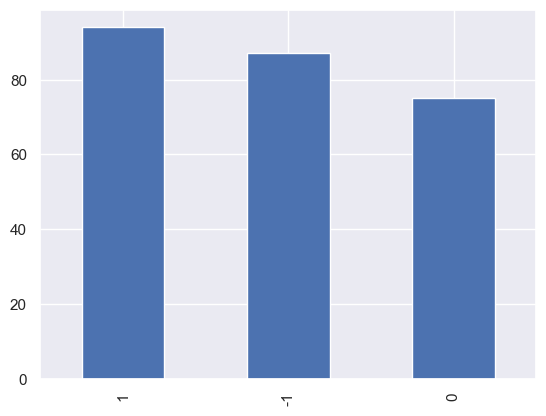

In [13]:
df_train['label'].value_counts().plot(kind='bar');

In [14]:
# This a list of the unique labels in our dataset
labels = list(df_train.label.unique())

In [15]:
words = df_train['NewsText'].dropna()\
                            .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',''.join(y))))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']

In [16]:
words.head()

,word,occurences
14,da,197.0
17,a,104.0
13,ta,56.0
10,ya,42.0
50,na,39.0


In [17]:
def xter_count(words, word_dict={}):
    """ this function takes in a list of characters and returns a dictionary 
        with each character as a key, and the value represents the number of 
        times that character appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [18]:
# Creating a dictionary of charaters with the number of times they appear in the message column
letters_dict = {}
for pp in labels:
    df = df_train.groupby('label')
    letters_dict[pp] = {}
    for row in df.get_group(pp)['NewsText']:
        letters_dict[pp] = xter_count(row, letters_dict[pp])

In [19]:
# A quick look into the character content of the message column
all_letters = set()
for pp in labels:
    for word in letters_dict[pp]:
        all_letters.add(word)

List of all letters in the data set

In [20]:
print(sorted(all_letters))

[' ', '!', '"', "'", '(', ')', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\xa0', 'Ƙ', 'ƙ', 'Ƴ', 'ƴ', 'ɓ', 'ɗ', '‘', '’', '“', '”']


In [21]:
# Start with one review:
#classifying the labels into it's category class
positive = df_train[df_train['label']==1]
neutral = df_train[df_train['label']==0]
negative = df_train[df_train['label']==-1]

In [22]:
#looping through each category of the NewsText and joining it as a string
all_news = " ".join(word for word in df_train.NewsText)
positive_news = " ".join(word for word in positive.NewsText)
neutral_news = " ".join(word for word in neutral.NewsText)
negative_news = " ".join(word for word in negative.NewsText)

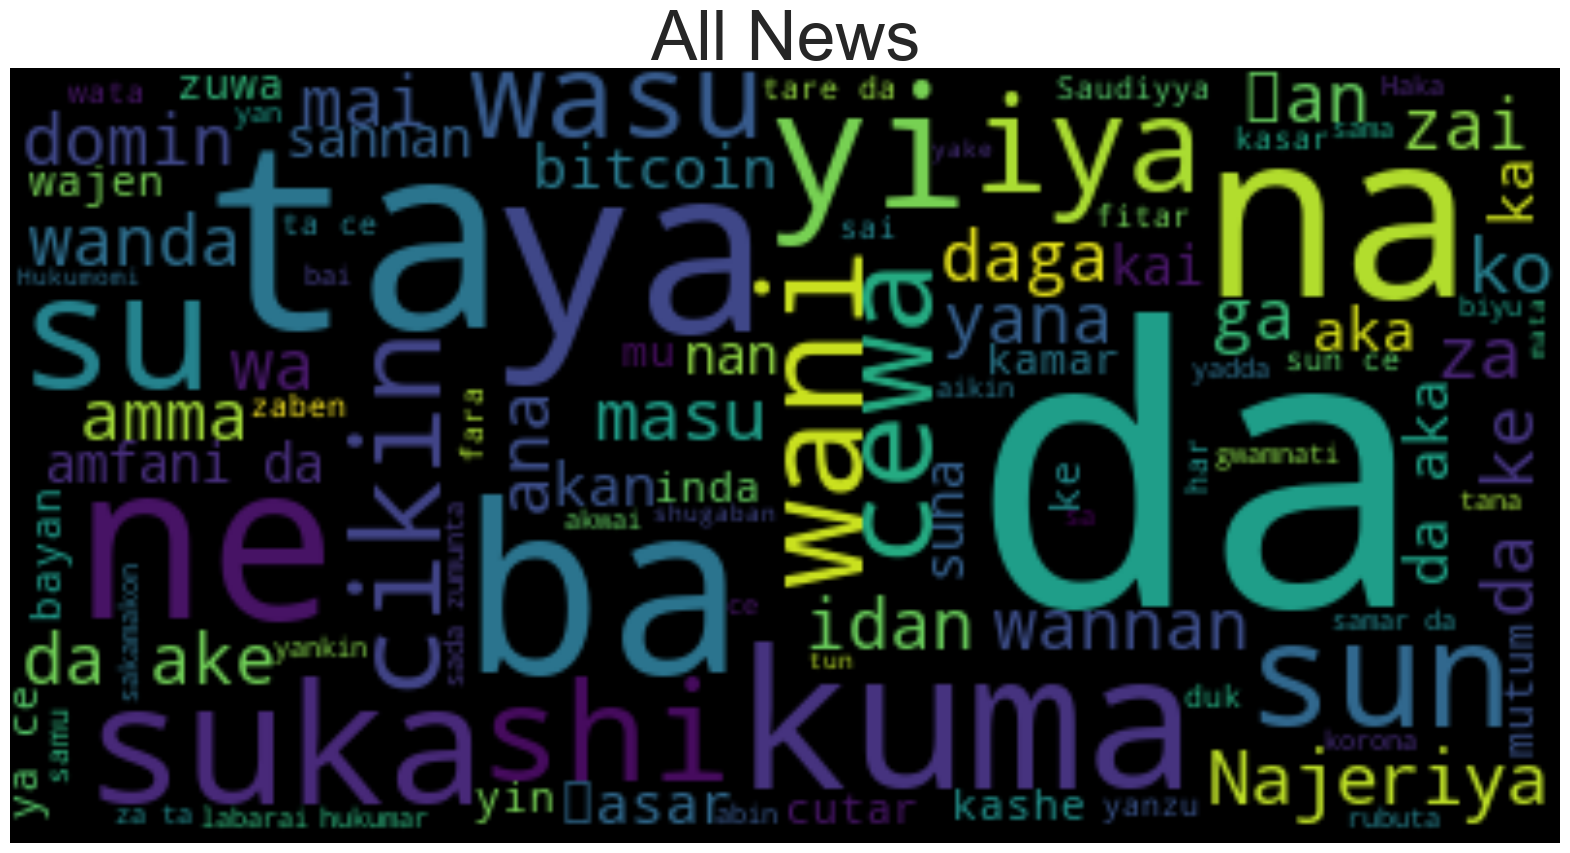

In [23]:
fig, ax = plt.subplots(1, 1, figsize  = (20,20))
# Create and generate a word cloud image:
wordcloud_all = WordCloud(max_font_size=100, max_words=100, background_color="black").generate(all_news)
# Display the generated image:
ax.imshow(wordcloud_all, interpolation='bilinear')
ax.set_title('All News', fontsize=50)
ax.axis('off');

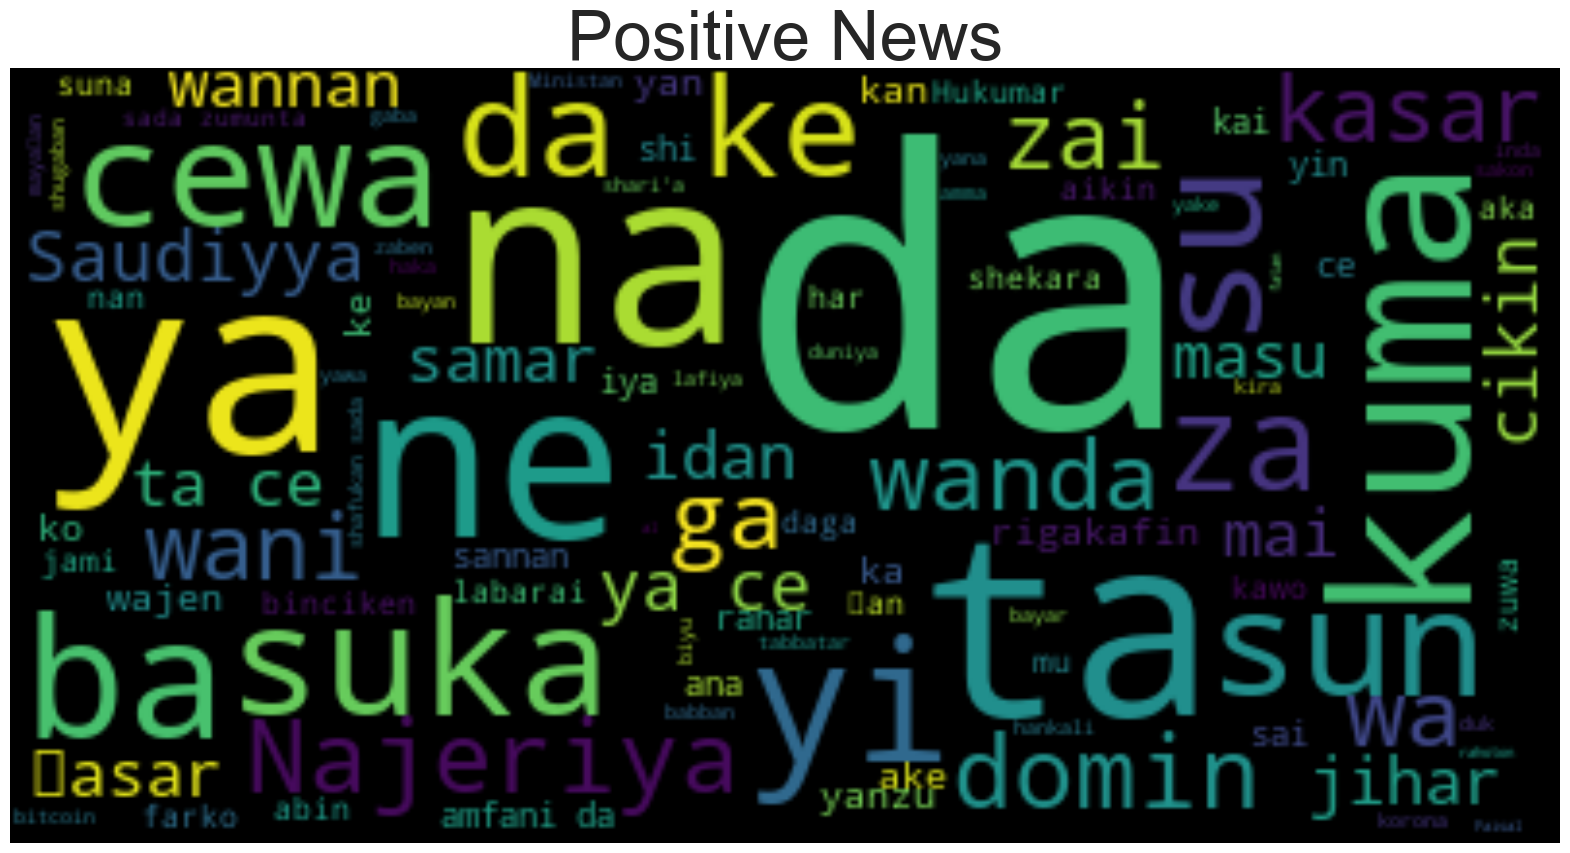

In [24]:
fig, ax = plt.subplots(1, 1, figsize  = (20,20))
# Create and generate a word cloud image:
wordcloud_pro = WordCloud(max_font_size=100, max_words=100, background_color="black").generate(positive_news)
# Display the generated image:
ax.imshow(wordcloud_pro, interpolation='bilinear')
ax.set_title('Positive News',fontsize=50)
ax.axis('off');

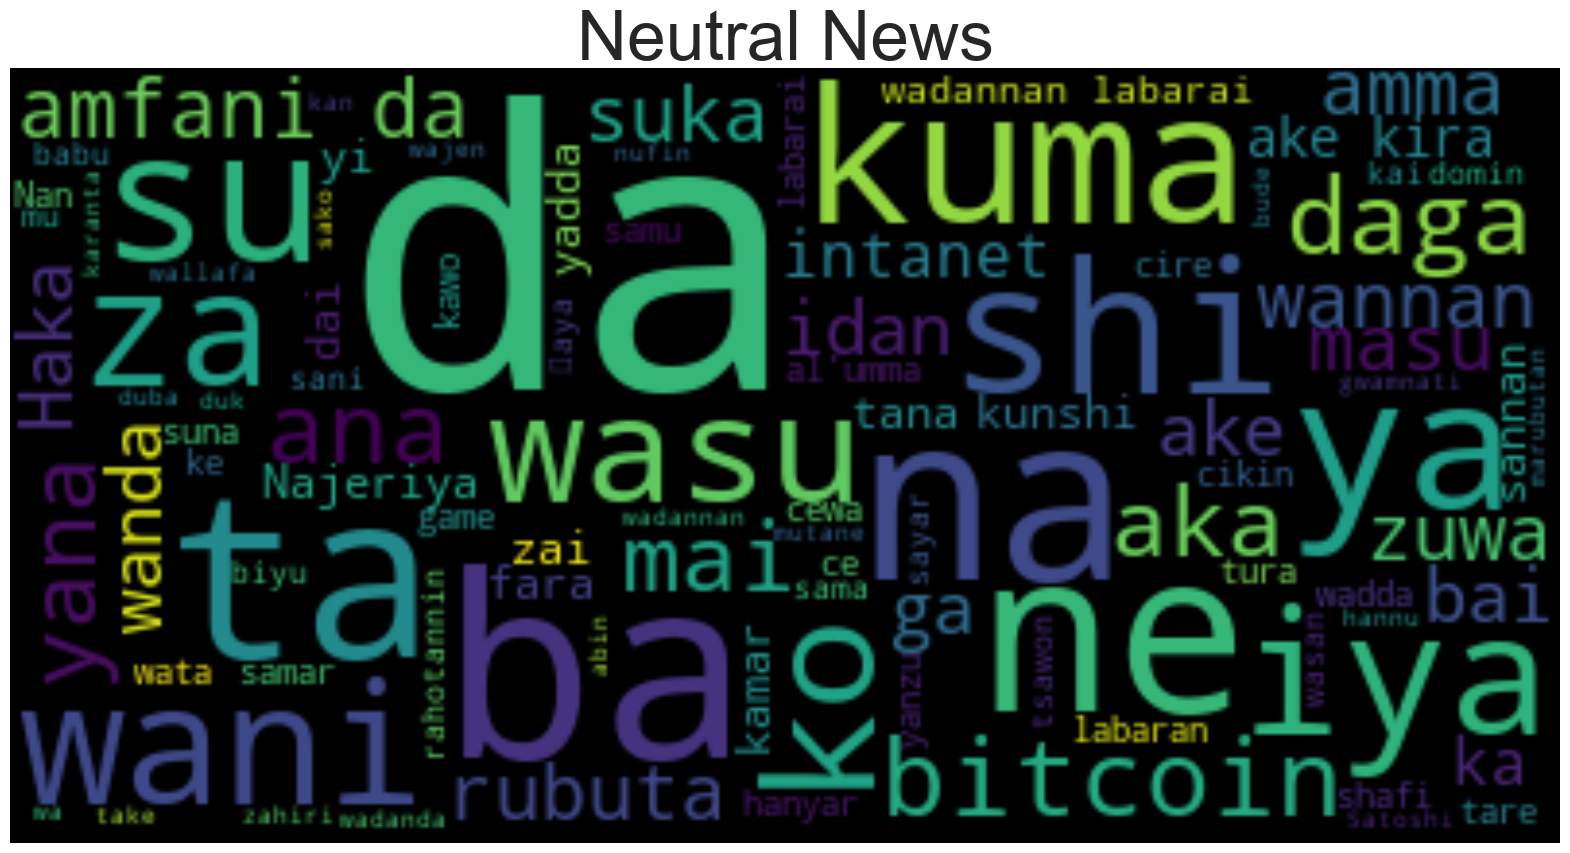

In [25]:
fig, ax = plt.subplots(1, 1, figsize  = (20,20))
# Create and generate a word cloud image:
wordcloud_pro = WordCloud(max_font_size=100, max_words=100, background_color="black").generate(neutral_news)
# Display the generated image:
ax.imshow(wordcloud_pro, interpolation='bilinear')
ax.set_title('Neutral News',fontsize=50)
ax.axis('off');

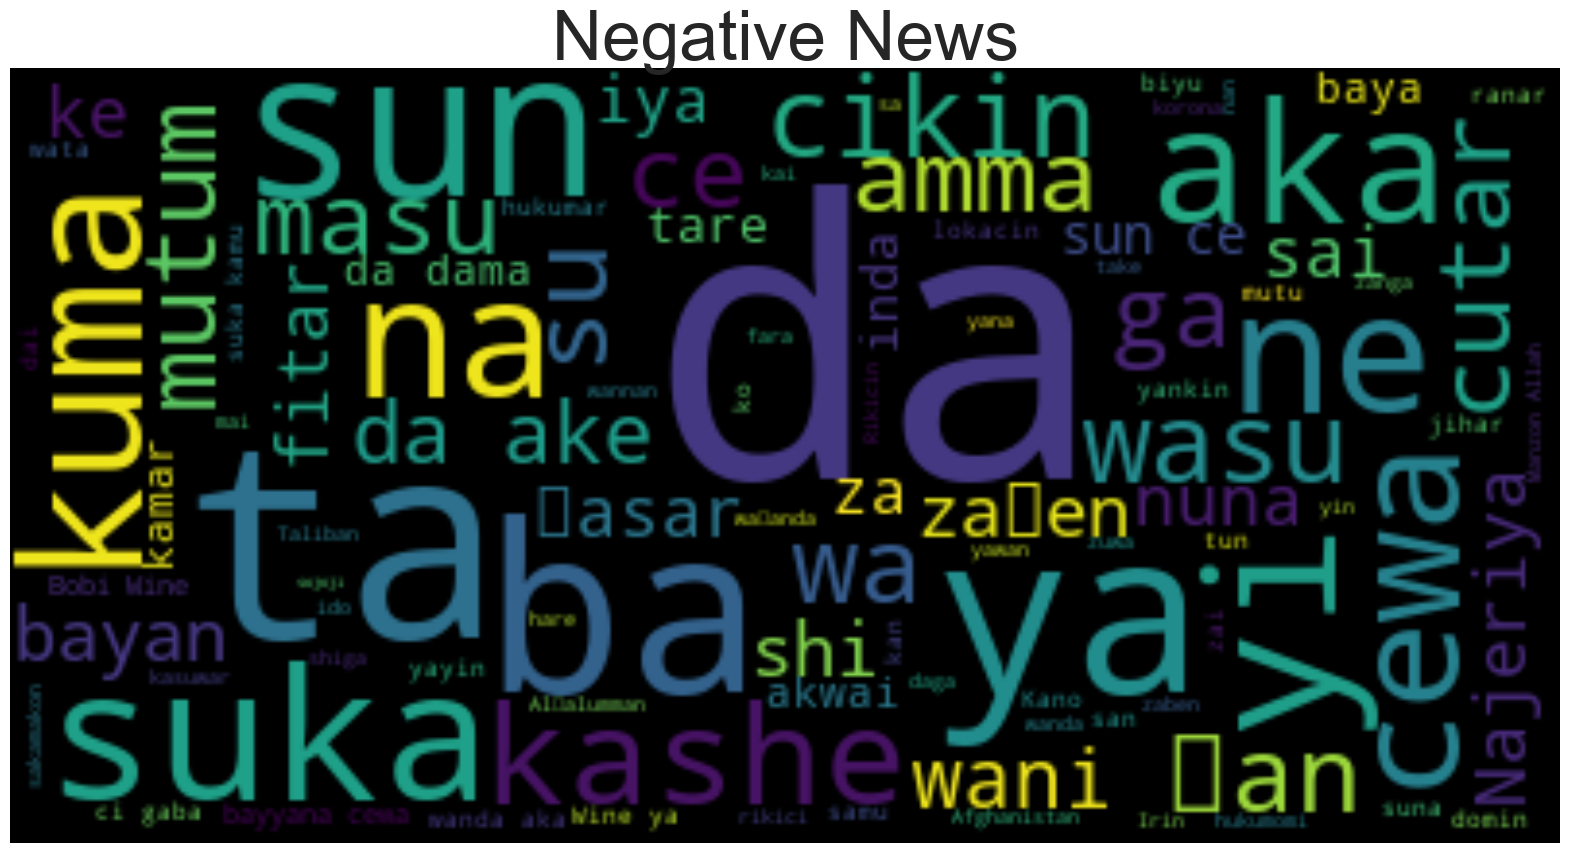

In [26]:
fig, ax = plt.subplots(1, 1, figsize  = (20,20))
# Create and generate a word cloud image:
wordcloud_pro = WordCloud(max_font_size=100, max_words=100, background_color="black").generate(negative_news)
# Display the generated image:
ax.imshow(wordcloud_pro, interpolation='bilinear')
ax.set_title('Negative News',fontsize=50)
ax.axis('off');

<a id="four"></a>
### 4. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>


In this section of text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format.

<img src="https://imgs.search.brave.com/sxwy8lWRY4tbRTAWP5AcgKawD8y9mqR67LUK3ICd33A/rs:fit:768:432:1/g:ce/aHR0cHM6Ly9jZG4u/c2xpZGVzaGFyZWNk/bi5jb20vc3NfdGh1/bWJuYWlscy9kYXRh/cHJlcHJvY2Vzc2lu/Zy1zYW5kZWVwcGF0/aWwtMTkwMzA1MDg0/MjI3LXRodW1ibmFp/bC00LmpwZz9jYj0x/NTUxNzc1NjEz" width="400">

For the twitter dataset, the following steps will be carried out:

* removing punctuation
* repeating characters
* cleaning urls
* removing numbers
* convert text to lower case
* convert texts into tokens
* removing stopwords


In [27]:
#function to remove noise from dataframe

def clean_column(column):
    #convert to lowercase()
    column = column.str.lower()
    #convert unicode characters into binary string
    column = column.str.encode('ascii', 'ignore').str.decode("utf-8")
    #removes web URL from text
    column = column.str.replace(r'https*\S+', 'url ', regex=True)
    #removes "\" from string
    column = column.str.replace(r'\'\w+', ' ', regex=True)
    
    column = column.str.replace(r'([A-Za-z])\1{2,}', r'\1', regex=True)
    # removes punctuation from string
    column = column.str.replace('[%s]' % re.escape(string.punctuation), ' ', regex=True)
    # removes numbers from string
    column = column.str.replace(r'\w*\d+\w*', ' ', regex=True)
    return column

In [28]:
#Applying the clean_column function to the specific df column
df_train['NewsText'] = clean_column(df_train['NewsText'])
df_test['NewsText'] = clean_column(df_test['NewsText'])

In [29]:
#Creating tokens to enable further analysis into the data set
tokeniser = TreebankWordTokenizer()
df_train['tokens'] = df_train['NewsText'].apply(tokeniser.tokenize)

In [30]:
df_train.head()

,id,NewsText,label,tokens
0,1000,nan ne muka kawo karshen labarai da rahotannin na wannan rana,0,"[nan, ne, muka, kawo, karshen, labarai, da, rahotannin, na, wannan, rana]"
1,1001,sai ku kasance tare da mu a gobe litinin idan rai ya kai mu domin sake kawo muku wasu labarai da rahotannin na musamman,0,"[sai, ku, kasance, tare, da, mu, a, gobe, litinin, idan, rai, ya, kai, mu, domin, sake, kawo, muku, wasu, labarai, da, rahotannin, na, musamman]"
2,1002,rahotanni sun ce tawagar bincike ta saudiyya a jamiar imam abdulrahman bin faisal ta samar da rigakafin korona kuma suna fatan fara gwajin rigakafin ba da dadewa ba,1,"[rahotanni, sun, ce, tawagar, bincike, ta, saudiyya, a, jamiar, imam, abdulrahman, bin, faisal, ta, samar, da, rigakafin, korona, kuma, suna, fatan, fara, gwajin, rigakafin, ba, da, dadewa, ba]"
3,1003,jaridar saudiyya da ake bugawa a london al sharq al awsat ce ta bayar da rahoton a ranar asabar inda ta ce tawagar wacce mace ke jagoranta farfesa iman al mansour ta kammala gwajin farko kuma an har an wallafa sakamakon binciken na kimiya,1,"[jaridar, saudiyya, da, ake, bugawa, a, london, al, sharq, al, awsat, ce, ta, bayar, da, rahoton, a, ranar, asabar, inda, ta, ce, tawagar, wacce, mace, ke, jagoranta, farfesa, iman, al, mansour, ta, kammala, gwajin, farko, kuma, an, har, an, wallafa, sakamakon, binciken, na, kimiya]"
4,1004,yanzu ana jiran tabbatar da ingancin rigakafin da nufin samun lasisin amfani da rigakafin a saudiyya,1,"[yanzu, ana, jiran, tabbatar, da, ingancin, rigakafin, da, nufin, samun, lasisin, amfani, da, rigakafin, a, saudiyya]"


In [31]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [32]:
label = {}
for pp in labels:
    df = df_train.groupby('label')
    label[pp] = {}
    for row in df.get_group(pp)['tokens']:
        label[pp] = bag_of_words_count(row, label[pp])

In [33]:
all_words = set()
for pp in labels:
    for word in label[pp]:
        all_words.add(word)

In [34]:
label['all'] = {}
for pp in labels:    
    for word in all_words:
        if word in label[pp].keys():
            if word in label['all']:
                label['all'][word] += label[pp][word]
            else:
                label['all'][word] = label[pp][word]

Counting the number of words in the train data set

In [81]:
total_words = sum([v for v in label['all'].values()])
print('There are:', total_words, 'words in the train dataset')

There are: 5226 words in the train dataset


In [82]:
words_1 = len([v for v in label['all'].values() if v == 1])

In [83]:
print('There are:', words_1, 'words that appear once in the train dataset')

There are: 823 words that appear once in the train dataset


In [53]:
rare_words = [k for k, v in label['all'].items() if v<=2] 

Creating a function that removes rare words from the dataset

In [54]:
def rare_preproc(x):
    
    x = ' '.join([word for word in x.split(' ') if word not in rare_words])
    x = re.sub(' +', ' ', x)
    return x

In [55]:
#Applying the rare words function to the specific df column
df_train['NewsText'] = df_train.NewsText.apply(rare_preproc)
df_test['NewsText'] = df_test.NewsText.apply(rare_preproc)

<a id="five"></a>
### 5. Transforming Dataset using TF-IDF Vectorizer
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

TF-IDF is short for Term frequency-Inverse Document Frequency.

**TF** is a measure of how often a phrase appears in a document, and **IDF** is about how important that phrase is.
The TF-IDF algorithm is used to weigh a keyword in any content and assign importance to that keyword based on the number of times it appears in the document.

In [56]:
# create features and target dataset
x = np.array(df_train['NewsText'])
y = np.array(df_train['label'])

In [57]:
#Create a TF-IDF object instance
vectorizer = TfidfVectorizer(min_df=3, max_df=0.25, ngram_range=(1,1), max_features=1000, smooth_idf=False, sublinear_tf=False, use_idf=True)
X = vectorizer.fit_transform(x)

<a id="six"></a>
### 6. Splitting our data into Train and Test Subset
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

The **Pareto Principle** is also called the 80/20 rule. The general point is that, in most cases, 80% of effects come from 20% of causes. So we'll split our data according to this principle.

In [58]:
#Pareto Principle Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.2,
                                                    random_state= 42)

<a id="seven"></a>
### 7. Model Building
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

---

This is the place where we create the main juice. This is the place for which all data preparation was done. We have hundreds of algorithms. These algorithms are developed by various researchers and most of them are freely available for our implementation.During model creation, we need to develop different models with different sets of hyperparameters. For model development, we need the following steps.

* Select an algorithm and 
* Create multiple models with their default hyperparameters.
* Establish metrics for model performance. Model performance metrics can be f1_score, accuracy, recall, precision, roc-auc, error rate, etc.
* create multiple models with a winning algorithm and fine tune hyperparameters.
* Check the model performance on the train dataset.



<img src="https://imgs.search.brave.com/kvRbwXzThu7-jN1wyZvQAlCG3OZm2LBm3kEqGkrE5Vo/rs:fit:1024:683:1/g:ce/aHR0cHM6Ly93d3cu/aW50YWNzLmNvbS93/cC1jb250ZW50L3Vw/bG9hZHMvMjAyMC8x/MC9idWlsZC1jdXN0/b20tbW9kZWxzLXdp/dGgtYXp1cmUtbWFj/aGluZS1sZWFybmlu/Zy1kZXNpZ25lci0x/MDI0eDY4My5qcGc" width="500" >

 We'll make use of the following models to classify the polarity of tweets present in our dataset;

* Naive Bayes
* LogisticsRegression Classifier
* DecisionTree Classifier
* RandomForest Classifier
* Support Vector Machine Classifier
* Linear Support Vector Machine Classifier
* Ridge Classifier

---

In [59]:
# NaiveBayes classifier
nby = MultinomialNB()
# Train model
nby.fit(X_train, y_train)
# Make predictions
nby_pred = nby.predict(X_test)

In [60]:
#LogisticRegression classifier
lr = LogisticRegression()
# Train model
lr.fit(X_train, y_train)
# Make predictions
lr_pred = lr.predict(X_test)

In [61]:
#DecisionTree classifier
dtc = DecisionTreeClassifier()
# Train model
dtc.fit(X_train, y_train)
# Make predictions
dtc_pred = dtc.predict(X_test)

In [62]:
#RandomForest classifier
rf = RandomForestClassifier()
# Train model
rf.fit(X_train, y_train)
# Make predictions
rf_pred = dtc.predict(X_test)

In [63]:
#Support Vector Machine
svc = SVC(C=5)
# Train model
svc.fit(X_train, y_train)
# Make predictions
svc_pred = svc.predict(X_test)

In [64]:
#Linear Support Vector Machine
svm = LinearSVC(C=0.1, class_weight='balanced', dual=True, loss='hinge', penalty= 'l2', fit_intercept=True, random_state=42)
# Train model
svm.fit(X_train, y_train)
# Make predictions
svm_pred = svm.predict(X_test)

In [65]:
#Ridge Classifier
rc = RidgeClassifier(alpha=2.5)
# Train model
rc.fit(X_train, y_train)
# Make predictions
rc_pred = rc.predict(X_test)

<a id="eight"></a>
### 8. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

---

The metrics used to evaluate the performance of the various models are ;

1. Accuracy , Precision , Recall and F1 scores              
2. Confusion Matrix
3. Classification Report


**Accuracy** is the ratio of the correctly predicted classifications (both True Positives + True Negatives) to the total Test Dataset.

> In other words, accuracy answers the following question:
How many labels did the model correctly classify out of all the labels?

 **Precision** is the ratio of correctly predicted positive observations (True Positives) to the model’s total predicted positive observations, both correct (True Positives) and incorrect (False Positives).

> In other words, precision answers the following question:
How many of those labels labelled by the model as 'Positive' are actually 'Positive' ?

 **Recall** is the ratio of correctly predicted positive observations (True Positives) to all observations in the actual class (Actual Positives).

> In other words, recall answers the following question:
Of all the labels that are 'Positive', how many of those did the model correctly classify as 'Positive' ?

 
 **F1 score** is the weighted average of Precision and Recall. Therefore, this score takes both False Positives and False Negatives into account to strike a balance between precision and Recall. 
> F1 Score is a better measure to use if we need to seek a balance between Precision and Recall _and_ there is an uneven class distribution (remember our dataset contains 'Psitive' labels compared to the rest classes ).


In [66]:
print('     Performance metrics for Naive Bayes model')
print('*' * 50)
print('F1 score: ',f1_score(y_test, nby_pred, average="micro"))
print('Recall score: ', recall_score(y_test, nby_pred, average="micro"))
print('Precison score: ', precision_score(y_test, nby_pred, average="micro"))
print('*' * 50)

     Performance metrics for Naive Bayes model
**************************************************
F1 score:  0.5192307692307693
Recall score:  0.5192307692307693
Precison score:  0.5192307692307693
**************************************************


In [67]:
print('     Performance metrics for Logistics model')
print('*' * 50)
print('F1 score: ',f1_score(y_test, lr_pred, average="micro"))
print('Recall score: ', recall_score(y_test, lr_pred, average="micro"))
print('Precison score: ', precision_score(y_test, lr_pred, average="micro"))
print('*' * 50)

     Performance metrics for Logistics model
**************************************************
F1 score:  0.4423076923076923
Recall score:  0.4423076923076923
Precison score:  0.4423076923076923
**************************************************


In [68]:
print('     Performance metrics for Decision Tree model')
print('*' * 50)
print('F1 score: ',f1_score(y_test, dtc_pred, average="micro"))
print('Recall score: ', recall_score(y_test, dtc_pred, average="micro"))
print('Precison score: ', precision_score(y_test, dtc_pred, average="micro"))
print('*' * 50)

     Performance metrics for Decision Tree model
**************************************************
F1 score:  0.34615384615384615
Recall score:  0.34615384615384615
Precison score:  0.34615384615384615
**************************************************


In [69]:
print('     Performance metrics for Random Forest model')
print('*' * 50)
print('F1 score: ',f1_score(y_test, rf_pred, average="micro"))
print('Recall score: ', recall_score(y_test, rf_pred, average="micro"))
print('Precison score: ', precision_score(y_test, rf_pred, average="micro"))
print('*' * 50)

     Performance metrics for Random Forest model
**************************************************
F1 score:  0.34615384615384615
Recall score:  0.34615384615384615
Precison score:  0.34615384615384615
**************************************************


In [70]:
print('     Performance metrics for Support Vector Machine model')
print('*' * 60)
print('F1 score: ',f1_score(y_test, svc_pred, average="micro"))
print('Recall score: ', recall_score(y_test, svc_pred, average="micro"))
print('Precison score: ', precision_score(y_test, svc_pred, average="micro"))
print('*' * 60)

     Performance metrics for Support Vector Machine model
************************************************************
F1 score:  0.4807692307692308
Recall score:  0.4807692307692308
Precison score:  0.4807692307692308
************************************************************


In [71]:
print(' Performance metrics for Linear Support Vector Machine model')
print('*' * 60)
print('F1 score: ',f1_score(y_test, svm_pred, average="micro"))
print('Recall score: ', recall_score(y_test, svm_pred, average="micro"))
print('Precison score: ', precision_score(y_test, svm_pred, average="micro"))
print('*' * 60)

 Performance metrics for Linear Support Vector Machine model
************************************************************
F1 score:  0.5769230769230769
Recall score:  0.5769230769230769
Precison score:  0.5769230769230769
************************************************************


In [72]:
print('     Performance metrics for Ridge model')
print('*' * 50)
print('F1 score: ',f1_score(y_test, rc_pred, average="micro"))
print('Recall score: ', recall_score(y_test, rc_pred, average="micro"))
print('Precison score: ', precision_score(y_test, rc_pred, average="micro"))
print('*' * 50)

     Performance metrics for Ridge model
**************************************************
F1 score:  0.4807692307692308
Recall score:  0.4807692307692308
Precison score:  0.4807692307692308
**************************************************


In [73]:
# define the pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LinearSVC())
])

# define the hyperparameters to search
parameters = {
    'vect__max_df': (0.25, 0.5, 0.75),
    'vect__ngram_range': ((1, 1), (1, 2), (1, 3)),
    'vect__min_df': (1, 2, 3),
    'clf__C': (0.1, 1, 10),
    'clf__penalty': ('l1', 'l2'),
    'clf__class_weight': (None, 'balanced'),
    'clf__loss': ('hinge', 'squared_hinge'),
    'clf__dual': (True, False)
}

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(df_train['NewsText'], df_train['label'])

# print the best hyperparameters and the corresponding accuracy score
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters:  {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__dual': True, 'clf__loss': 'hinge', 'clf__penalty': 'l2', 'vect__max_df': 0.75, 'vect__min_df': 3, 'vect__ngram_range': (1, 3)}
Best accuracy:  0.5428355957767723


### Training using the best model with tuned parameters

In [74]:
#Linear Support Vector Machine
svm = LinearSVC(C=0.1, class_weight='balanced', dual=True, loss='hinge', penalty= 'l2', fit_intercept=True, random_state=42)
# Train model
svm.fit(X_train, y_train)
# Make predictions
svm_pred = svm.predict(X_test)

### Test on Unseen Dataset for Kaggle submission

In [75]:
xs = np.array(df_test['NewsText'])

In [76]:
xs = vectorizer.transform(xs)

In [77]:
svc_pred = svc.predict(xs)

In [78]:
# Preparing csv file for Kaggle submission 
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['label'] = svc_pred
submission.to_csv('label_submission.csv', index=False)

# Validate
submission = pd.read_csv('label_submission.csv')

<a id="nine"></a>
### 9. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

In this project, seven (7) machine learning models were trained for a label classification task. The performance of the models was evaluated using the f1 score, precisiona and recall and it was found that the **Linear Supprot Vector Machine** model performed better than the other 6 models. This suggests that the **Linear Supprot Vector Machine** model may be a good choice for this particular News polarity analysis. Further evaluation and testing may be needed to confirm this, but the initial results, based on the evaluation report given above for all seven (7) models judging by their respective f1 scores, indicate that the **Linear Supprot Vector Machine** model is a strong performer in this domain.
